<a href="https://colab.research.google.com/github/vivekmodgill/Introduction-To-Signal-Processing/blob/main/Signal_Processing_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction:

<p align="justify"
> In a technical but broad sense, a signal is a formal representation of a phenomenon that changes over time or in different spaces. Signal processing, on the other hand, refers to any manual or mechanical action that alters, examines, or otherwise manipulates the information within a signal. To illustrate, think about something as straightforward as ambient temperature: once we've established a structured model for this physical quantity, such as measuring it in Celsius degrees, we can capture how temperature changes over time in various ways, resulting in a dataset that can be thought of as a "temperature signal." Even basic processing tasks can be carried out manually, like plotting this signal on graph paper.



<p align="justify"
> It's essential to recognize that signal processing works with an abstract portrayal of a physical measurement, rather than directly manipulating the quantity itself.

<p align="justify"
> A discrete-time signal is a sequence of complex values. Keep in mind that a sequence is characterized as a complex-valued function with an integer index represented by 'n,' where 'n' belongs to the set of integers (Z). Consequently, it forms an unending, two-sided assembly of values.




In [ ]:
!pip install mne --quiet
!pip install mne_connectivity --quiet
!pip install pymatreader --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 747.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import gdown
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import scipy
from scipy.signal import hilbert
from scipy import signal
from scipy.signal import butter, lfilter, hilbert, chirp
from scipy.fft import fft, fftfreq

import mne
from mne.preprocessing import ICA
import mne_connectivity
from mne_connectivity import spectral_connectivity_epochs
from mne_connectivity.viz import plot_sensors_connectivity

import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import HTML
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

#Generating a Synthesized Signal with Different Phases and Frequencies
<p align="justify"

In this tutorial, we'll walk through a Python code snippet that generates and plots a synthesized signal containing multiple sinusoidal components with varying phases and frequencies. This is a valuable exercise for understanding how to create complex signals for signal processing applications.
<p align="justify"

In the initial step, we set up several essential parameters for our signal generation. These include the sampling rate, which determines how often we measure the signal per second. We also specify the duration of the signal, the range of frequencies for our components, the number of components to include, and we generate random phases for each component.
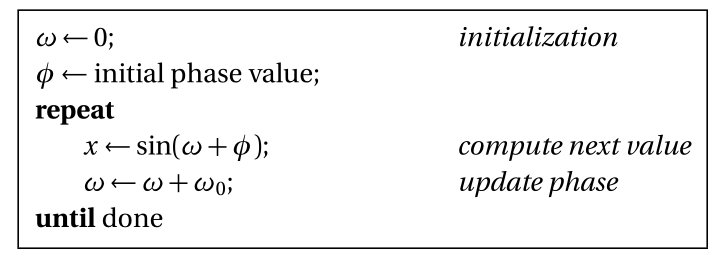
<p align="justify"

We create a sequence of time values t using **numpy.linspace()**. These values cover the duration of our signal, ensuring they are evenly spaced according to our chosen sampling rate. Setting endpoint=False ensures that the endpoint is not included in the time values.
<p align="justify"

We create an array synthesized_signal and then iterate through each of the specified sinusoidal components (num_components). For each component, we assign a random frequency within the defined range, and we calculate the sinusoidal waveform with that frequency and a random phase. These components are added together to create our synthesized signal.
<p align="justify"

In the final step, we use Matplotlib to visualize our synthesized signal. We create a figure, plot the signal using the time values t, and add a title, labels for the axes, and a grid for clarity. The resulting plot displays our synthesized signal, showcasing its complexity with multiple sinusoidal components, each having distinct phases and frequencies.
<p align="justify"

This code provides a hands-on example of how to create and manipulate signals, which is fundamental in signal processing and related fields. You can modify the parameters to experiment with different signal characteristics and gain a deeper understanding of signal synthesis.


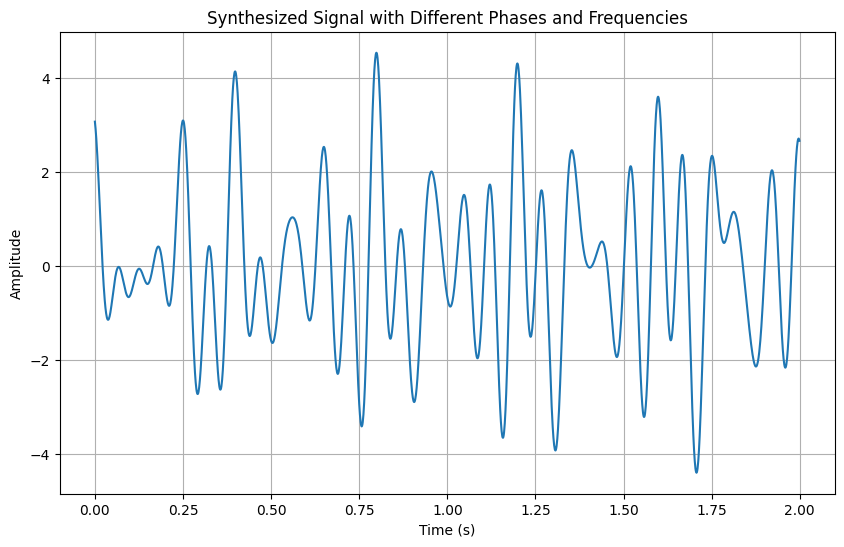

In [ ]:
# Parameters
sampling_rate   =   # Sampling rate in Hz
duration        =   # Duration of the signal in seconds
frequency_range = (, )  # Frequency range in Hz
num_components  = 5  # Number of sinusoidal components
phases          = np.random.uniform(0, 2 * np.pi, num_components)  # Random phases for each component

# Time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the synthesized signal
synthesized_signal = np.zeros_like(t)
for i in range(num_components):
    frequency = np.random.uniform(*frequency_range)
    component = np.sin(2 * np.pi * frequency * t + phases[i])
    synthesized_signal += component

# Plot the synthesized signal
plt.figure(figsize=(10, 6))
plt.plot(t, synthesized_signal)
plt.title('Synthesized Signal with Different Phases and Frequencies')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Hilbert Transform
<p align="justify"

The Hilbert Transform is a mathematical operation used in signal processing to obtain the complex analytic representation of a real-valued signal. This complex analytic representation includes information about both the amplitude and phase of the original signal. The key properties of the Hilbert Transform include:
<p align="justify"

**Complex Transformation**: The Hilbert Transform transforms a real-valued signal into a complex signal, often referred to as the "analytic signal."

**Phase Information**: The phase of the analytic signal represents the phase of the original signal and is useful for tasks like estimating the instantaneous frequency.
<p align="justify"

**Envelope Detection**: One of the primary applications of the Hilbert Transform is envelope detection. By taking the absolute value of the analytic signal, you obtain the envelope of the original signal. The envelope represents the amplitude variations of the signal over time.
<p align="justify"

**Orthogonality**: The Hilbert Transform is orthogonal to the original signal, meaning that the dot product of the original signal and its Hilbert Transform is zero. This property is useful for some mathematical and signal processing applications.
<p align="justify"

The Hilbert Transform is particularly valuable in analyzing signals with rapidly changing amplitudes or in applications such as speech processing, audio processing, and vibration analysis.
<p align="justify"

Mathematically, the Hilbert Transform of a real-valued signal $x(t)$ is denoted as $H[x(t)]$ and is defined by the convolution with the function $\frac{1}{\pi t}$​:

<div style="text-align:center">
</div>

<center>$[H[x(t)] = \frac{1}{\pi} \int_{-\infty}^{\infty} \frac{x(\tau)}{t - \tau} d\tau]$</center>


In [ ]:
# @markdown
video_url = f"https://www.youtube.com/embed/VyLU8hlhI-I?si=nYiAYSHwYpE5Zw_T"
HTML(f'<iframe width="560" height="315" src="{video_url}" frameborder="0" allowfullscreen></iframe>')


# Computing and Visualizing the Envelope of a Signal
<p align="justify"

In this tutorial, we'll explore how to compute the envelope of a signal using the Hilbert transform. The envelope represents the magnitude or "envelope" of the signal, highlighting its amplitude variations over time. We'll walk through the Python code that accomplishes this task and visualize the original signal alongside its envelope.
<p align="justify"

We begin by computing the analytic signal of our original signal synthesized_signal using the Hilbert transform. The analytic signal provides information about both the amplitude and phase of the signal.
<p align="justify"

Next, we calculate the envelope of the signal by taking the absolute value of the analytic signal. This process isolates the amplitude component of the signal, effectively showing how the signal's amplitude varies over time.
<p align="justify"

The resulting plot shows how the envelope captures the variations in amplitude of the original signal. This technique is commonly used in signal processing to analyze and extract specific features of a signal, such as detecting the intensity of certain frequency components.

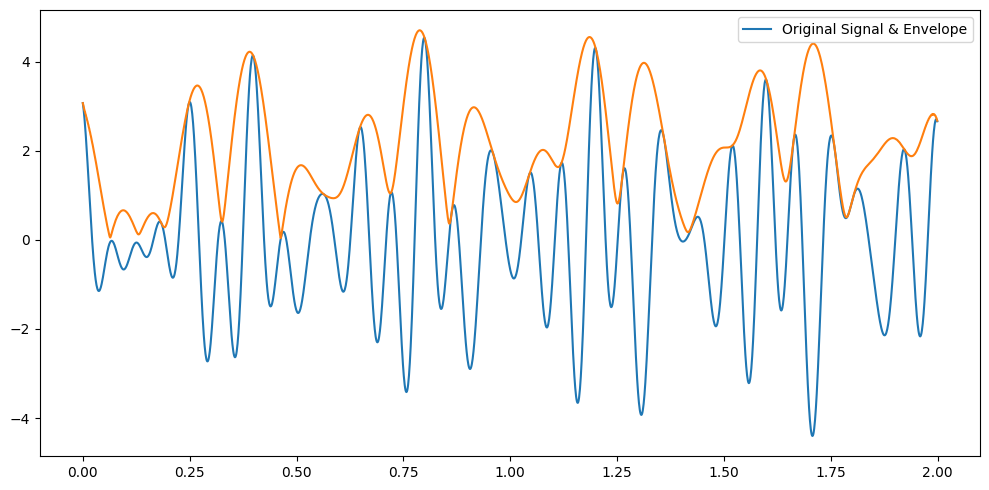

In [ ]:
# Compute Hilbert Transform
analytic_signal = hilbert(synthesized_signal)

# Compute Envelope of the signal
envelope = np.abs(analytic_signal)


# Plot the original signal and its envelope
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)
plt.plot(t, synthesized_signal, label='Original Signal & Envelope')
plt.legend()
plt.subplot(1, 1, 1)
plt.plot(t, envelope)
plt.tight_layout()
plt.show()


# Fourier Transform
<p align="justify"

The Fourier transform of a signal is an alternative representation of the data
in the signal. While a signal lives in the time domain, its Fourier representation lives in the frequency domain. We can move back and forth at will
from one domain to the other using the direct and inverse Fourier operators,
since these operators are invertible.
<p align="justify"

The Fourier Transform is a fundamental mathematical tool in signal processing and mathematics. It allows you to analyze a complex signal or function by decomposing it into a sum of simpler sinusoidal functions. This transformation is particularly useful for understanding the frequency components that make up a signal.
<p align="justify"

Here are the key aspects of the Fourier Transform:
<p align="justify"

**Decomposition into Frequency Components**: The Fourier Transform takes a time-domain signal (a function of time) and transforms it into the frequency domain. In other words, it expresses the signal as a sum of sinusoidal functions of different frequencies.
<p align="justify"

**Frequency Spectrum**: The result of a Fourier Transform is often referred to as the frequency spectrum or frequency representation of the signal. It shows how much of each frequency component is present in the original signal.
<p align="justify"

**Complex Numbers**: The Fourier Transform is typically represented using complex numbers, where the real part represents the amplitude of the sinusoidal component, and the imaginary part represents its phase.
<p align="justify"

**Continuous and Discrete Fourier Transforms**: There are two main versions of the Fourier Transform: the Continuous Fourier Transform (CFT) for continuous-time signals and the Discrete Fourier Transform (DFT) for discrete-time signals (sampled data). The Fast Fourier Transform (FFT) is a computationally efficient algorithm for computing the DFT.
<p align="justify"

**Applications**: Fourier Transforms are used in various fields, including signal processing, image processing, audio analysis, physics, engineering, and many more. They are essential for tasks like filtering, spectral analysis, and modulation.
<p align="justify"

The mathematical representation of the Fourier Transform for a continuous-time signal $x(t)$ is as follows:


<div style="text-align:center">

<center>$X(f) = \int_{-\infty}^{\infty} x(t) \cdot e^{-j2\pi ft} \, dt$</center>

</div>


<div style="text-align:left">
Here, $X(f)$ is the frequency representation of the signal, and $f$ is the frequency variable.
</div>

In practice, for discrete-time signals, the DFT or FFT is used, and the formula looks slightly different:



<div style="text-align:center">
<center>$X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi kn/N}$</center>
</div>


<div style="text-align:left">
<p align="justify"

Where $X(k)$ represents the frequency components at discrete frequencies $k$ within the range from $0$ to $N−1$ and  N is the number of samples in the signal.
<p align="justify"

Overall, the Fourier Transform is a powerful mathematical tool that allows you to understand the frequency content of signals, making it invaluable in a wide range of applications.
</div>

In [ ]:
# @markdown
video_url = f"https://www.youtube.com/embed/spUNpyF58BY?si=i8jOJGTLuqW49FkZ"
HTML(f'<iframe width="560" height="315" src="{video_url}" frameborder="0" allowfullscreen></iframe>')


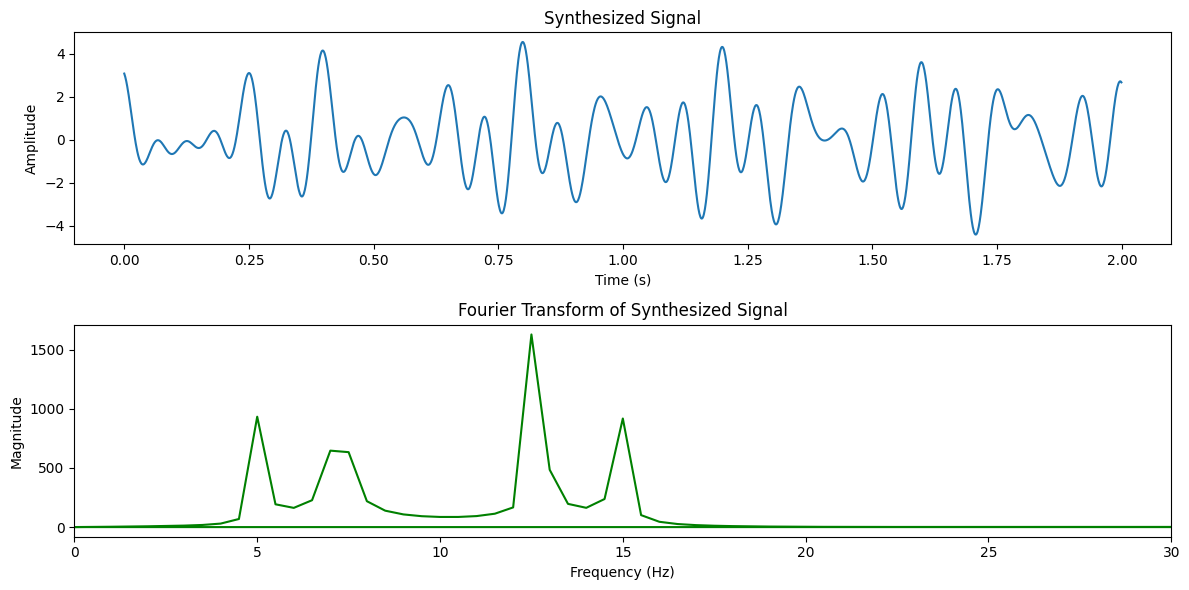

In [ ]:
# @title
# Compute the Fourier Transform
fourier_transform = np.fft.fft(synthesized_signal)
frequencies       = np.fft.fftfreq(len(t), 1 / sampling_rate)

# Plot the original signal and its Fourier Transform
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, synthesized_signal)
plt.title('Synthesized Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fourier_transform), color='Green')
plt.title('Fourier Transform of Synthesized Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 30)  # Limit the x-axis range for better visibility

plt.tight_layout()
plt.show()

# Butterworth bandpass filter
A Butterworth bandpass filter is a type of electronic filter used in signal processing and electronics to selectively pass a specific range of frequencies while attenuating (reducing) frequencies outside that range. It belongs to the family of Butterworth filters, which are known for their smooth frequency response and minimal distortion.

Here are the key characteristics and features of a Butterworth bandpass filter:

* Frequency Range: A bandpass filter is designed to allow signals within a specified frequency range (the "passband") to pass through relatively unaffected, while attenuating signals outside this range (the "stopband").

* Cutoff Frequencies: It has two cutoff frequencies, a lower cutoff frequency (lowcut) and an upper cutoff frequency (highcut). These frequencies define the range of frequencies that will be allowed to pass through the filter.

* Order: The "order" of the filter determines its roll-off rate. Higher-order filters have steeper roll-off characteristics, meaning they attenuate frequencies outside the passband more rapidly.

* Smooth Frequency Response: Butterworth filters are known for their maximally flat frequency response in the passband. This means they introduce minimal distortion to the signals within the passband.

* Transfer Function: The Butterworth bandpass filter is characterized by a specific transfer function in the Laplace domain, which defines its behavior in the frequency domain.

# Frequency Filter
## Butterworth Bandpass Filtering

<p align="justify"

In this tutorial, we'll explore how to implement Butterworth bandpass filtering in Python using the provided code. Butterworth filters are commonly used in signal processing to isolate specific frequency components from a signal. We'll break down the code into two functions: butter_bandpass and butter_bandpass_filter.

<p align="justify"

###***butter_bandpass Function***:
* lowcut and highcut: These are the lower and upper cutoff frequencies of the bandpass filter. They define the range of frequencies that will be allowed to pass through the filter.
<p align="justify"

* **fs**: The sampling frequency of the input signal.
<p align="justify"

* **order**: The order of the Butterworth filter, which determines the filter's roll-off characteristics. A higher order results in a steeper roll-off.
<p align="justify"

* **nyq**: The Nyquist frequency, which is half of the sampling frequency.
<p align="justify"

* **low and high**: These are the normalized cutoff frequencies calculated as a ratio of the cutoff frequencies and the Nyquist frequency.
<p align="justify"

* **b, a**: These are the filter coefficients computed using the butter function from a signal processing library (not shown in this code snippet). These coefficients define the filter's transfer function.
<p align="justify"

###***butter_bandpass_filter Function***:
* data: This is the input signal that you want to filter.
<p align="justify"


* **lowcut and highcut**: These are the cutoff frequencies for the bandpass filter, defining the desired frequency range for filtering.
<p align="justify"

* **fs**: The sampling frequency of the input signal.
<p align="justify"

* **order**: The order of the Butterworth filter, as explained above.
<p align="justify"

* **b and a**: These are the filter coefficients obtained from the butter_bandpass function.
<p align="justify"

* **y**: This is the filtered output signal obtained by applying the Butterworth filter to the input data.
<p align="justify"

You can use the butter_bandpass_filter function to apply a bandpass filter to your data by providing the appropriate parameters. This is particularly useful when you want to isolate specific frequency components of a signal while removing unwanted frequencies.



In [ ]:
def butter_bandpass(lowcut, highcut, fs, order):
    nyq  = 0.5 * fs
    low  = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y    = lfilter(b, a, data)
    return y

In [ ]:
lowcut  = #Provide a lower frequency value of your range of interest
highcut = #Provide a higher frequency value of your range of interest
fsignal = butter_bandpass_filter(synthesized_signal, lowcut, highcut, sampling_rate, order = 4)

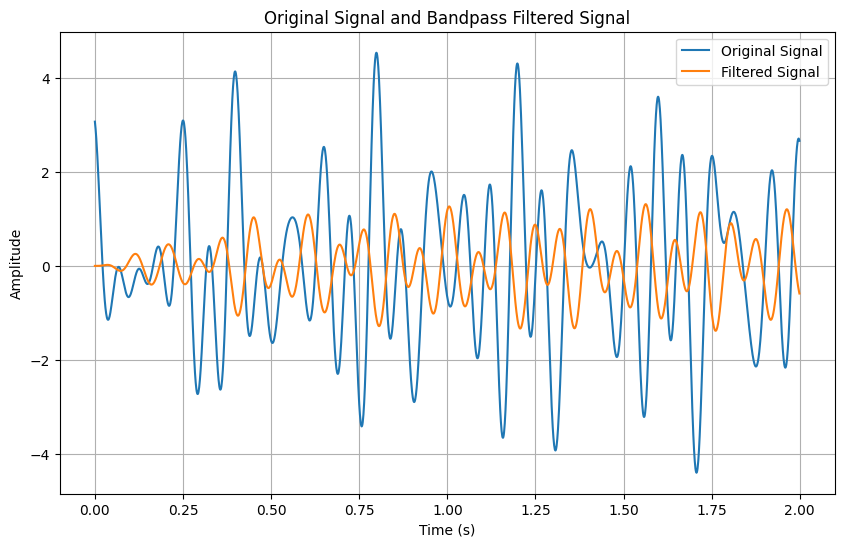

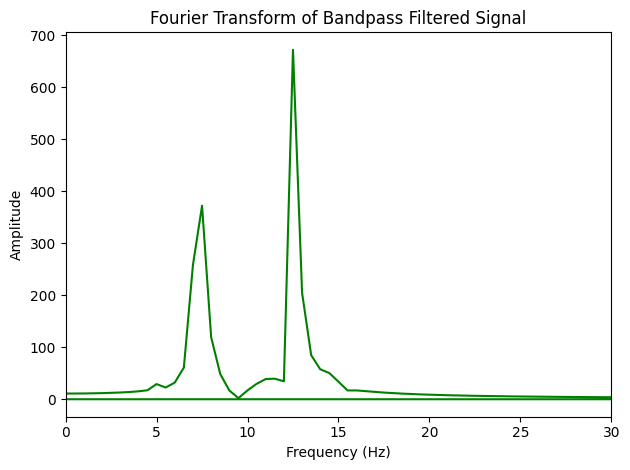

In [ ]:
# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, synthesized_signal, label='Original Signal')
plt.plot(t, fsignal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Original Signal and Bandpass Filtered Signal')
plt.grid(True)
plt.show()

# Compute the Fourier Transform
fourier_transform = np.fft.fft(fsignal)
frequencies = np.fft.fftfreq(len(t), 1 / sampling_rate)

# Plot the original signal and its Fourier Transform
plt.plot(frequencies, np.abs(fourier_transform), color='Green')
plt.title('Fourier Transform of Bandpass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 30)  # Limit the x-axis range for better visibility

plt.tight_layout()
plt.show()

In [ ]:
# Create interactive widget for adjusting filter order
def plot_filtered_signal(order=4):

    fsignal = butter_bandpass_filter(synthesized_signal, lowcut, highcut, sampling_rate, order = order)

    # Clear previous plots
    plt.clf()

    # Plot the original and filtered signals
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.plot(t, synthesized_signal, label='Original Signal')
    plt.plot(t, fsignal, label='Filtered Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.title('Original Signal and Bandpass Filtered Signal')
    plt.grid(True)

    # Plot the Fourier Transform
    fourier_transform = np.fft.fft(fsignal)
    frequencies = np.fft.fftfreq(len(t), 1 / sampling_rate)
    plt.subplot(1, 2, 2)
    plt.plot(frequencies, np.abs(fourier_transform), color='Green')
    plt.title('Fourier Transform of Bandpass Filtered Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim(0, 30)  # Limit the x-axis range for better visibility

    plt.tight_layout()
    plt.show()

# Create interactive widget
order_slider = widgets.IntSlider(value=4, min=1, max=10, step=1, description='Filter Order')
interactive_plot = interactive(plot_filtered_signal, order=order_slider)

# Display the interactive widget
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(IntSlider(value=4, description='Filter Order', max=10, min=1), Output(layout=Layout(heig…

# Orthogonalisation
<p align="justify"

Orthogonalisation is a mathematical process used to transform a set of vectors into a new set of vectors that are orthogonal (perpendicular) to each other. In linear algebra, orthogonal vectors are those that have a dot product of zero, meaning they are at right angles to each other. Orthogonalisation is a fundamental concept in various fields, including linear algebra, signal processing, and machine learning. Here's a brief explanation:
<p align="justify"

**Orthogonal Vectors**: In a Euclidean space (a space with a concept of distance and angles), two vectors are said to be orthogonal if their dot product is zero. In two dimensions, this means the vectors are at right angles to each other, and in higher dimensions, it implies a similar notion of perpendicularity.
<p align="justify"

**Orthogonalisation Process**: Given a set of linearly independent vectors, orthogonalisation involves transforming these vectors into a new set of vectors that are orthogonal to each other.

* Gram-Schmidt Orthogonalisation: This is one of the most commonly used methods for orthogonalisation. It takes a set of linearly independent vectors and generates an orthogonal (or even orthonormal) set of vectors. The process involves iteratively subtracting the projections of vectors onto previously orthogonalized vectors.

The Gram-Schmidt orthogonalisation process involves taking a set of linearly independent vectors and generating an orthogonal (or orthonormal) set of vectors.
Let's assume you have a set of vectors ${v_1,v_2,...,v_n}$ and you want to obtain an orthogonal set ${u_1,u_2,...,u_n}$

The Gram-Schmidt orthogonalisation process can be described as follows:
Initialize $u_1$ as the normalized version of $v_1$:

\begin{align*}
u_1 &= \frac{v_1}{\|v_1\|} \\
\end{align*}

where $∥v_1∥$ represents the Euclidean norm (magnitude) of $v_1$​.

For $i=2$ to $n$, compute $u_i$​ as follows:

\begin{align*}
u_i &= v_i - \sum_{j=1}^{i-1} \text{proj}_{u_j}(v_i) \\
\end{align*}

where $proj_uj(v_i)$ is the projection of $v_i$ onto $u_j$:

\begin{align*}
\text{proj}_{u_j}(v_i) &= \frac{\langle v_i, u_j \rangle}{\|u_j\|^2} u_j
\end{align*}


Here:

* $⟨v_i,u_j⟩$ represents the inner product (dot product) of $v_i$ and $u_j$.
* $∥u_j∥^2$ represents the squared norm of $u_j$.

After completing these steps, you will obtain an orthogonal set of vectors ${u_1​ ,u_2​,…,u_n​}$ that spans the same subspace as the original vectors ${v_1​,v_2,…,v_n​}$.



# Understanding Orthogonal Signals and Dot Product

In this step, we create an array $t$ that represents time values ranging from $0$ to $2$${\pi}$ (one full cycle) with 100 evenly spaced points. These time values will be used as the x-axis for plotting.

**Generating Orthogonal Signals:**
Here, we generate two sinusoidal signals, $signal_1$ and $signal_2$, using the $sin$ and $cos$ functions, respectively. These signals are orthogonal because they have a 90-degree phase difference, which means they are perpendicular when plotted against each other.

**Computing the Dot Product (Inner Product):**
The code calculates the dot product (also known as the inner product) between $signal_1$ and $signal_2$ using NumPy's $np.dot$ function. The dot product is a measure of how much these signals align or overlap. If the dot product is zero, it indicates that the signals are orthogonal.

Finally, the dot product (inner product) between $signal_1$ and $signal_2$. If the signals are truly orthogonal, the dot product will be close to zero, confirming their orthogonality.

This provides a practical illustration of orthogonal signals and the concept of the dot product to determine orthogonality.



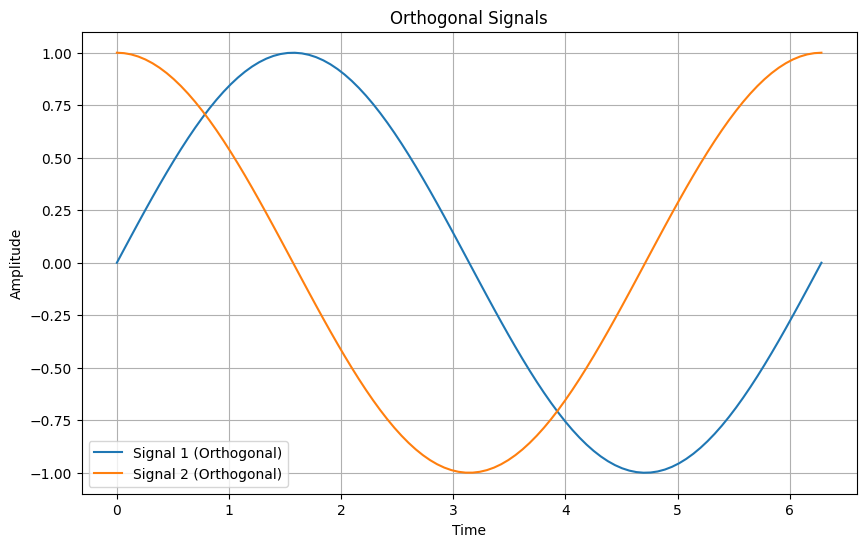

Dot Product (Inner Product): -0.0


In [ ]:
# Generate time values
t = np.linspace(0, 2 * np.pi, 100)

# Generate two orthogonal sinusoidal signals
signal1 = np.sin(t)
signal2 = np.cos(t)

# Compute the dot product (inner product)
dot_product = np.dot(signal1, signal2)

# Plot the orthogonal signals
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='Signal 1 (Orthogonal)')
plt.plot(t, signal2, label='Signal 2 (Orthogonal)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Orthogonal Signals')
plt.legend()
plt.grid(True)
plt.show()

# Print the dot product (inner product)
print(f"Dot Product (Inner Product): {round(dot_product, 10)}")


In this tutorial, we've embarked on a journey through the fascinating world of Signal Processing. We started by formulating our own signal. Along the way, we delved into frquency filter, fourier transform, orthogonalisation and Hilbert transform. We hope this tutorial has been a valuable resource, equipping you with the knowledge and tools to analyse EEG/MEG/fMRI data.

We encourage you to share your thoughts, questions, and feedback with us. Learning is a collaborative journey, and we're here to support your quest for knowledge.

Thank you for joining us on this tutorial. We look forward to accompanying you on many more learning adventures in the future.

Happy learning!



Vivek
(vivek.sharma@donders.ru.nl)



Further reading:

Prandoni, P., & Vetterli, M. (2008). Signal Processing for Communications. EPFL Press; First Edition (August 19, 2008). https://www.sp4comm.org/